# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Markov Chain Monte Carlo Methods

> Author: Matt Brems

### LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Identify the Markov property.
- Describe Monte Carlo simulations.
- Describe how MCMC works.
- Identify situations where MCMC is beneficial.

---

### Framing: What should you get out of this lecture?
- Markov Chains and Monte Carlo methods (separately) are important tools in many settings. These are terms with which you want to be familiar, as this won't be the last time that you see them.
- When asked about MCMC, there are three answers you can give.
    - **Basic**: MCMC allows us to leverage computers to do Bayesian statistics.
    - **Intermediate**: MCMC is a method that can find the posterior distribution of our parameter of interest. Specifically, this type of algorithm generates Monte Carlo simulations in a way that relies on the Markov property, then accepts these simulations at a certain rate to get the posterior distribution.
    - **Advanced**: The full-blown lecture.
    
Our goal is to get you to that intermediate stage today.

---

### OPENING: Bayes' Theorem

$$ f(\theta|y) = \frac{f(y|\theta)f(\theta)}{f(y)} \propto f(y|\theta)f(\theta)$$

- $f(\theta)$: prior distribution of the parameter of interest.
- $f(y|\theta)$: likelihood function of your data given all possible values of the parameter.
- $f(\theta|y)$: posterior distribution of the parameter of interest.

<details><summary>Our goal is to always find the posterior distribution. Why would we want that?</summary>
- The posterior distribution is a complete summary of $\theta$ after taking our data/evidence into account.
</details>

<details><summary>What is conjugacy?</summary>

- Conjugacy is where our prior and our posterior follow the same parametric form.
</details>

<details><summary>What happens when we don't have conjugacy?</summary>

- Before computers, we had to pick priors or likelihoods that "played nicely" together, even if our prior or likelihood wasn't the best choice for our data. It might be harder to summarize our posterior distribution. There might not exist a [closed-form solution](https://en.wikipedia.org/wiki/Closed-form_expression) to our posterior distribution.
</details>

<details><summary>If we can't find a "closed-form" solution to our posterior distribution... can we at least approximate one?</summary>

- YES!
</details>

---
### MCMC Methods
Markov Chain Monte Carlo methods will allow us to approximate the posterior distribution of the parameter of interest. (This is the **why** to what we learned with PyMC!)

There are three main components to MCMC Methods.
- Monte Carlo Methods
- Markov Chains
- Acceptance-Rejection Sampling

---
### Monte Carlo Simulations

Monte Carlo simulations are a powerful way for us to model complex systems by generating random numbers!

For example, we can generate random numbers to estimate the value of $\pi$!

- The area of a circle is given by $\pi r^2$, where $r$ is the radius (or half-distance) of the circle.
- The area of a square is given by $s^2$, where $s$ is the length of one side of the square.

<img src="./images/circle_square.png" alt="drawing" width="250"/>

- If we place a circle inside a square like above, then the side length of the square $s$ is exactly $2r$.
- If we calculate the area of the circle divided by the area of the square, we get:

$$
\begin{eqnarray*}
\frac{\text{area of circle}}{\text{area of square}} &=& \frac{\pi r^2}{s^2} \\
\\
&=& \frac{\pi r^2}{4 r^2} \\
\\
&=& \frac{\pi}{4}
\end{eqnarray*}
$$

How can we find the exact amount of area in the circle and the exact amount of area in the square?
- Complicated math.

Can we get a good approximation of the area in the circle and the area in the square?
- **Yes!** Let's pretend like we're sprinking sand all over the circle and square and can count up how much sand falls inside the circle and how much sand falls inside the square.
- Realistically, we can't do this. There's not a way for us to easily count how many grains of sand fall inside the circle... but we can use computers to do this.

<img src="./images/pi_estimation.gif" alt="drawing" width="400"/>

In [1]:
# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Set a seed.
np.random.seed(42)

# Spread grains of sand.
x = np.random.uniform(0, 1, 250_000)
y = np.random.uniform(0, 1, 250_000)

In [3]:
# Check if each grain of sand is inside the circle.

# Start counter at 0.
count = 0

# Iterate through each grain of sand.
for i in range(len(x)):
    
    # Check to see if each grain of sand is inside the circle.
    if x[i] ** 2 + y[i] ** 2 <= 1:
        
        # If so, add one to count.
        count += 1

In [4]:
# Check sand in circle divided by sand in square.
count / 250_000

0.78562

$$
\begin{eqnarray*}
\frac{\text{area of circle}}{\text{area of square}} &=& \frac{\pi}{4} \\
\Rightarrow \frac{\text{sand in circle}}{\text{sand in square}} &\approx& \frac{\pi}{4} \\
\Rightarrow 4 \times \frac{\text{sand in circle}}{\text{sand in square}} &\approx& \pi \\
\end{eqnarray*}
$$

In [5]:
# Multiply by four.
4 * count / 250_000

3.14248

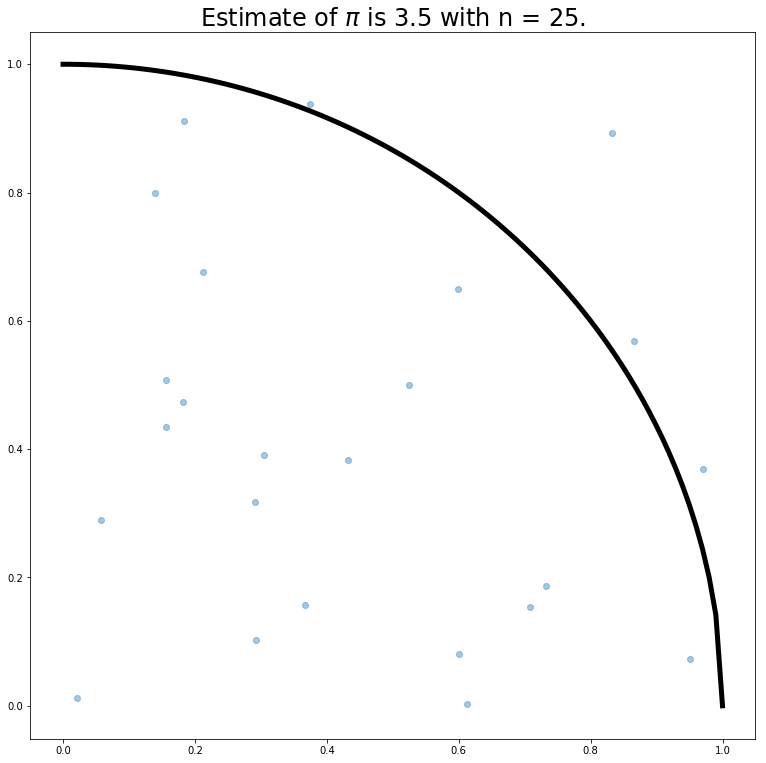

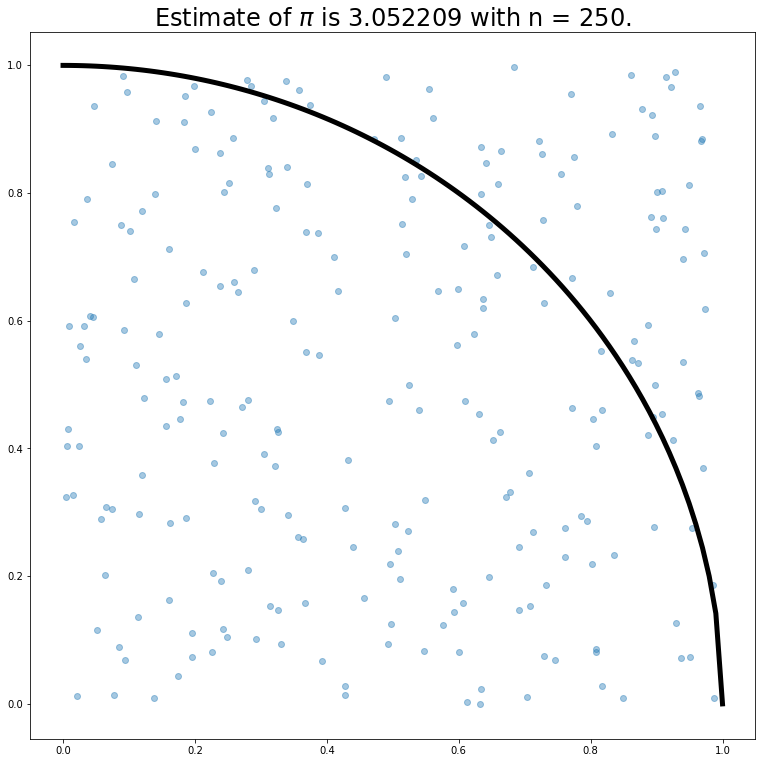

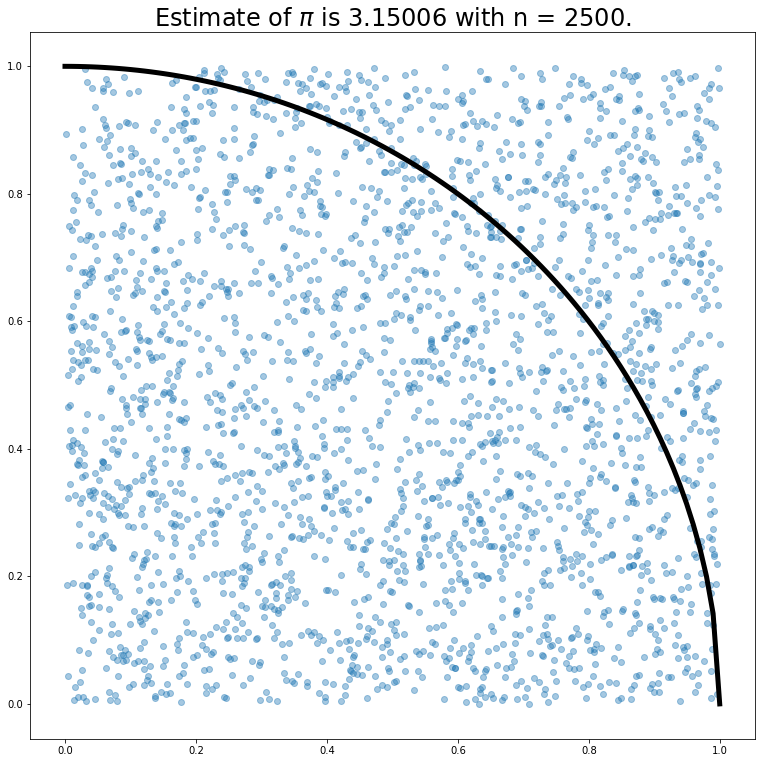

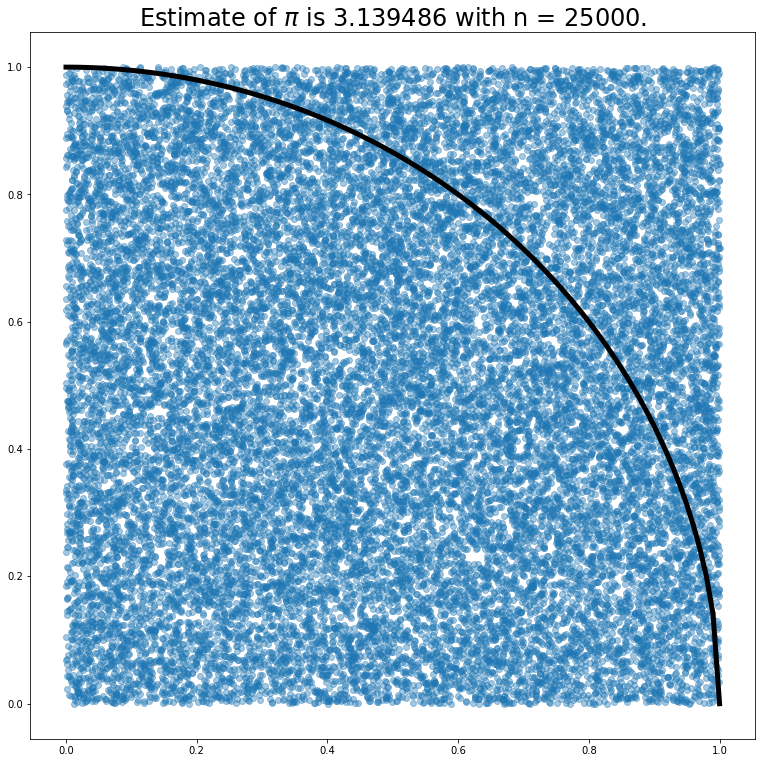

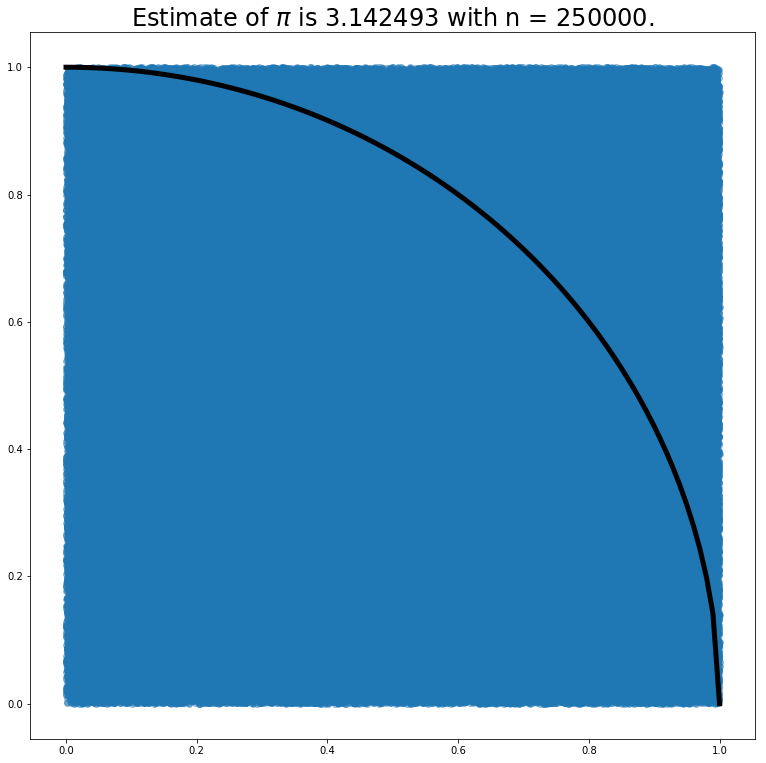

In [6]:
# Start counter at 0.
count = 0

# What horizontal axis values are we plotting?
horiz = np.linspace(0,1,100)

# Iterate through each grain of sand.
for i in range(len(x)):
    
    # Check to see if each grain of sand is inside the circle.
    if x[i] ** 2 + y[i] ** 2 <= 1:
        
        # If so, add one to count.
        count += 1
    
    if (i + 1) in [25, 250, 2_500, 25_000, 250_000]:
        # Set figure size.
        plt.figure(figsize = (13, 13))

        # Plot line of circle: x^2 + y^2 = 1
        plt.plot(horiz, # horizontal axis values
                 [np.sqrt(1 - x_i ** 2) for x_i in horiz], # height of function values
                 lw = 5, # line width = 5
                 color = 'k') # change it to black

        # Generate scatterplot of points.
        plt.scatter(x[:i], # horizontal location of dot
                    y[:i], # vertical location of dot
                    alpha = 0.4) # transparency of dot (make it 60% transparent, 40% solid)

        plt.title(fr'Estimate of $\pi$ is {round(4 * count / i,6)} with n = {i + 1}.', fontsize = 24);

Monte Carlo simulations are used to model much more complicated things as well. In calculus, if you remember calculating the integral (area under the curve), you had to remember those nasty "integration by parts" formulas and "u-substitution." Monte Carlo simulations make that [relatively trivial with computers](https://www.youtube.com/watch?v=GZXhGwCXct0)!

There are three main components to MCMC Methods.
- Monte Carlo Methods
- Markov Chains
- Acceptance-Rejection Sampling

### Markov Chains

Markov Chains are a way for us to see how a random variable changes from one state to another over time.

[Setosa.io](http://setosa.io/blog/2014/07/26/markov-chains/) has a great visualization of Markov chains.

There's something called the **Markov property** that we'll rely on when doing MCMC methods.

The **Markov property** is the following:

$$
f(X_{t+1}|X_t) = f(X_{t+1}|X_t, X_{t-1}, X_{t-2}, \ldots, X_1)
$$

In words, if I know what is happening at time $t$, then I know just as much about what will happen at $t+1$ as I would know if I knew what happened at time $t$, $t-1$, $t-2$ all the way back to time $1$.

Phrased another way, if I know what value my variable takes on at time $t$, knowing what value my variable took on at $t-1$ and so on doesn't provide me with any additional information!

#### Markov Chain Examples
- Genetics: If I know the genotypes {`AA`, `Aa`, `aa`} of the parents, then that summarizes what I can learn about the children. Knowing the genotypes of grandparents, great-grandparents, etc. doesn't give me any additional information!
- Monopoly: Knowing where players currently exist on the board on turn $t$ completely summarizes where players will be on the board in turn $t+1$. Knowing where people were one, two, or more turns ago doesn't give me any additional information!
- Baseball: Knowing the current number of outs and the current position of runners completely summarizes what can happen in the next "at bat."
- Google's PageRank Algorithm: Google assumes that where you are now on the Internet completely summarizes where you will go next.
    
    
The Markov property is very important to MCMC methods. (Spoiler alert: when we sample random numbers, we're going to rely on the previous random number to help randomly generate the next one!) Additionally, the long-run behavior of Markov chains is very interesting. Let's take a look.

I want to model the weather. I'll assume that the Markov property applies here, even though that's probably not a very good assumption for us to make.

Let $C$ indicate **clear**, $R$ indicate **rainy**, and $S$ indicate **snowy**.

- If $X_t=C$, then $P(X_{t+1}=C)=0.6$, $P(X_{t+1}=R)=0.3$, $P(X_{t+1}=S)=0.1$.
- If $X_t=R$, then $P(X_{t+1}=C)=0.4$, $P(X_{t+1}=R)=0.4$, $P(X_{t+1}=S)=0.2$.
- If $X_t=S$, then $P(X_{t+1}=C)=0.3$, $P(X_{t+1}=R)=0.3$, $P(X_{t+1}=S)=0.4$.

We can represent this in a matrix.

$$\begin{equation} \mathbf{A} = 
\left[\begin{array}{ccc} 
      0.6 & 0.4 & 0.3\\
      0.3 & 0.4 & 0.3\\
      0.1 & 0.2 & 0.4\\
\end{array}\right]
\end{equation}$$

The first row and first column represent clear, the second row and column represent rainy, and the third row and column represent snowy.

In [7]:
# Create matrix of probabilities.
transition_matrix = np.array([[0.6, 0.4, 0.3],
                              [0.3, 0.4, 0.3],
                              [0.1, 0.2, 0.4]])

In [8]:
# Check out the transition matrix.
transition_matrix

array([[0.6, 0.4, 0.3],
       [0.3, 0.4, 0.3],
       [0.1, 0.2, 0.4]])

In order to find what the weather is like on day two ($\mathbf{y}_2$), I need to specify the weather on day 1 ($\mathbf{y}_1$), then multiply $\mathbf{A}$ by $\mathbf{y}_1$.

In [9]:
# Create weather vector for day 1.
y_1 = np.array([0, 0, 1])

In [10]:
y_1

array([0, 0, 1])

In [11]:
# Calculate weather vector for day 2.
y_2 = np.matmul(transition_matrix, y_1)

In [12]:
y_2

array([0.3, 0.3, 0.4])

In order to find what the weather is like on day three ($\mathbf{y}_3$), I need to specify the weather on day 2 ($\mathbf{y}_2$), then multiply $\mathbf{A}$ by $\mathbf{y}_2$.

In [13]:
# Calculate weather vector for day 3.
y_3 = np.matmul(transition_matrix, y_2)

In [14]:
y_3

array([0.42, 0.33, 0.25])

We can actually find out the weather on day 3 from just using day 1!

$$
\begin{eqnarray*}
\mathbf{y}_3 &=& \mathbf{A}\mathbf{y}_2 \\
\mathbf{y}_3 &=& \mathbf{A}(\mathbf{A}\mathbf{y}_1) \\
\mathbf{y}_3 &=& \mathbf{A}^2\mathbf{y}_1 \\
\end{eqnarray*}
$$

In [15]:
# Calculate weather vector for day 2.
np.matmul(np.matmul(transition_matrix, transition_matrix), y_1)

array([0.42, 0.33, 0.25])

**What happens if we want to predict 1,000 days from now?**

In [16]:
# Define function.
def long_run(A, num_steps, first_state):
    
    # Take matrix to num_steps power.
    A_power = np.linalg.matrix_power(A, num_steps)
    
    # Return weather vector on day num_steps + 1.
    return np.matmul(A_power, first_state)

In [17]:
# Predict 1,000 days from now.
long_run(transition_matrix, 1_000, y_1)

array([0.47619048, 0.33333333, 0.19047619])

**What about 10,000?**

In [18]:
# Predict 10,000 days from now.
long_run(transition_matrix, 10_000, y_1)

array([0.47619048, 0.33333333, 0.19047619])

**Note:** Markov chains, under pretty weak assumptions, will converge to some long-run behavior. (This is really good for MCMC.)

**What happens if it's not snowy on day 1? How does this affect that long-run behavior?**

In [19]:
# Create weather vector for day 1.
y_1 = np.array([0.5, 0.5, 0])

In [20]:
# Predict 1,000 days from now.
long_run(transition_matrix, 1_000, y_1)

array([0.47619048, 0.33333333, 0.19047619])

**Note:** Markov chains, under pretty weak assumptions, will converge to some long-run behavior **independent of the starting point!** (This is *exceptionally* good for MCMC.)
- These assumptions, called **irreducibility** and **aperiodicity**, will always be satisfied in our MCMC implementation. We won't dive into more than that here.

### Combining Monte Carlo Simulations with Markov Chains

Remember that, as always, our goal is to get to the **posterior distribution of the parameter of interest**.

In PyMC, we generate a **trace** or **chain** of values from the posterior distribution.

Without getting into the third piece (yet), let's look at what we're doing.


If we were to just generate random numbers without any rhyme or reason, we'd be doing a Monte Carlo simulation.
<img src="./images/montecarlo.gif" alt="drawing" width="600"/>

- On the right-hand side, we have all of our samples. In this case, we're sampling from a $N(0.5, \sigma)$ distribution.
- On the left-hand side, we have a frequency histogram of our samples.
- Note how the distribution we're sampling from stays the same here. This won't actually be the case in MCMC - we want this distribution to change. (Spoiler alert: we want this distribution to get closer to the posterior distribution!)

Suppose that, instead, we're still generating random numbers. However, this time, the last random number we generate influences the next random number we generate.

<img src="./images/markovchain.gif" alt="drawing" width="600"/>

- Our right-hand side is our trace plot and our left-hand side is the histogram of sampled values from the trace plot.
- Note that the distribution we're sampling from is now changing! Specifically, the mean of the distribution we sample from at each step is now the previously sampled observation.
    - This is our **Markov property** in action - the step at time $t$ is the only one that influences what happens at time $t+1$!
- What we're viewing right now is known as a "random walk." It's our hope that this gets closer to the posterior distribution. We'll need a little extra help to get there, though.
- The extra help we need is an acceptance-rejection algorithm to tell us "are we going in the right direction or the wrong direction?"

---
There are three main components to MCMC Methods.
- Monte Carlo Methods
- Markov Chains
- Acceptance-Rejection Sampling

### Acceptance-Rejection Sampling

- Acceptance-rejection sampling is a specific type of Monte Carlo sampling.

- We’re going to sample some observation, then decide whether to keep it (accept it) or discard it (reject it). 
    - Specifically, we will accept these values a certain percentage of the time and reject a certain percentage of the time.

- As our random walk moves about, we need some way to make sure that we’re moving in the right direction.
    - If we are moving in the right direction, we’ll accept that sample.
    - If we aren’t moving in the right direction, we may reject that sample.

We’ll walk through a specific algorithm to accept/reject, called the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).
- PyMC by default will implement a more sophisticated algorithm called the [No U-Turn Sampler](https://arxiv.org/abs/1111.4246).

The Metropolis-Hastings algorithm allows us to, at each step, identify whether we are getting “hotter” or “colder.”

#### Metropolis-Hastings Algorithm
Part 1. Generate $\theta_{proposal} \sim N(\theta_{t-1}, \sigma)$.

Part 2. Calculate the ratio of posterior probabilities $r = \frac{P(\theta_{proposal}|y)}{P(\theta_{t-1}|y)}$.
- Since we have specified the prior and the likelihood, we can just find the posterior probability of these specific values!
- If $r \ge 1$, then $\theta_{proposal}$ is a likelier value for our posterior distribution than $\theta_{t-1}$. You can think of this as "we're heading in the right direction."
- If $r < 1$, then $\theta_{proposal}$ is not a likelier value for our posterior distribution than $\theta_{t-1}$. You can think of this as "we're heading in a direction of lower probability."

Part 3. Calculate our acceptance probability $\alpha = \min\{r,1\}$.
- This is the probability that we'll accept $\theta_{proposal}$ as our new value $\theta_t$.
- If $r \ge 1$, then $\theta_{proposal}$ is a likelier value for our posterior distribution than $\theta_{t-1}$ and our acceptance probability is 100%!
- If $r < 1$, then $\theta_{proposal}$ is not a likelier value for our posterior distribution than $\theta_{t-1}$, so we may reject $\theta_{proposal}$.

Part 4. We want to get our computer to basically flip a coin with probability of success $\alpha$ to determine whether or not we accept $\theta_{proposal}$. We generate $U_t \sim Uniform(0,1)$.
- If $U_t \le \alpha$, then accept $\theta_{proposal}$. (That is, $\theta_t = \theta_{proposal}$.)
- If $U_t > \alpha$, then reject $\theta_{proposal}$. (That is, $\theta_t = \theta_{t-1}$.)

Remember that we've already seen how Markov chains and Monte Carlo simulations can work together. Let's add the acceptance/rejection component to this!

<img src="./images/acceptancerejection.gif" alt="drawing" width="550"/>

We will repeat this process a large number of times - the number of samples we generate with `pm.sample()`.

Once we do this long enough and visually inspect traceplots to convince ourselves that we have “converged” to the posterior distribution of interest, we usually discard early samples (before we converged), then we store some large $n$ of the later samples.
- We might run this multiple times (by setting `chains` > 1 in `PyMC`) to protect against converging to a local optimum.

Once we have our sample of size $n$, we can conduct whatever inference we want on the posterior distribution of the parameter of interest.
- Find the mean.
- Find the median.
- Find the 95% ‘highest posterior density.’
- Find the variance.

Let's head to [a website](https://chi-feng.github.io/mcmc-demo/app.html#RandomWalkMH,standard) to see this in action!

## Closing

<details><summary>Our goal is to always find the posterior distribution. Why would we want that?</summary>

- The posterior distribution is a complete summary of $\theta$ after taking our data/evidence into account.
</details>

<details><summary>When is MCMC helpful?</summary>

- It's helpful in cases when we don't have conjugate priors/posteriors... or if we just don't want to do the math!
</details>

<details><summary>How does MCMC work?</summary>

- MCMC is a method that can find the posterior distribution of our parameter of interest. Specifically, this type of algorithm generates Monte Carlo simulations in a way that relies on the Markov property, then accepts these simulations at a certain rate to get the posterior distribution.
</details>

### LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Identify the Markov property.
- Describe Monte Carlo simulations.
- Describe how MCMC works.
- Identify situations where MCMC is beneficial.

---

### Framing: What should you get out of this lecture?
- Markov Chains and Monte Carlo methods (separately) are important tools in many settings. These are terms with which you want to be familiar, as this won't be the last time that you see them.
- When asked about MCMC, there are three answers you can give.
    - **Basic**: MCMC allows us to leverage computers to do Bayesian statistics.
    - **Intermediate**: MCMC is a method that can find the posterior distribution of our parameter of interest. Specifically, this type of algorithm generates Monte Carlo simulations in a way that relies on the Markov property, then accepts these simulations at a certain rate to get the posterior distribution.
    - **Advanced**: The full-blown lecture.
    
Our goal was to get you to that intermediate stage today.